In [1]:
#non-linear Regression

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('desktop/Stock.csv')
data.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2/7/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2/8/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2/9/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177506,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [11]:
data.dropna(inplace=True)

In [12]:
data.drop('Ticker',axis=1,inplace=True)

In [13]:
data.drop('Date',axis=1,inplace=True)

<Axes: xlabel='High', ylabel='Low'>

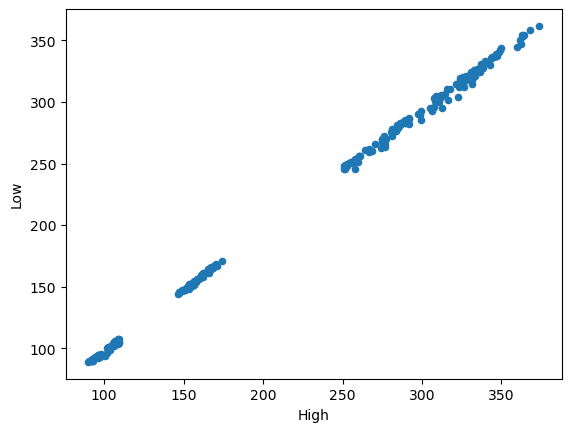

In [14]:
data.plot.scatter('High','Low')

C:\Users\Net\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


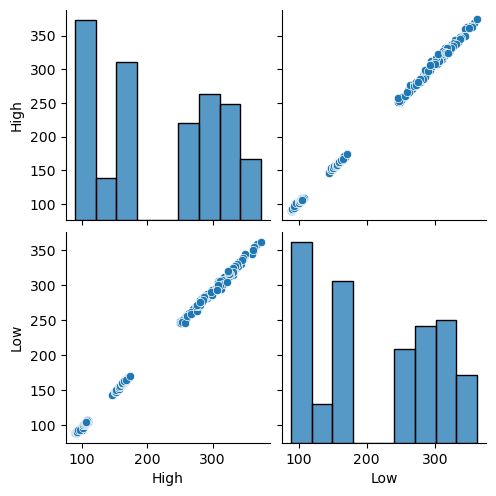

In [28]:
sns.pairplot(data,vars=['High','Low'])

In [51]:
sliced_x=data.iloc[:,0:3].join(data.iloc[:,3:5])


sliced_x.head()

,Open,High,Low,Close,Adj Close
0,150.639999,155.229996,150.639999,154.649994,154.414230
1,153.880005,154.580002,151.169998,151.919998,151.688400
2,153.779999,154.330002,150.419998,150.869995,150.639999
3,149.460007,151.339996,149.220001,151.009995,151.009995
4,150.949997,154.259995,150.919998,153.850006,153.850006


In [53]:
sliced_y=data.iloc[:,5:7]
sliced_y.head()

,Volume
0,83322600
1,64120100
2,56007100
3,57450700
4,62199000


In [54]:
from sklearn.preprocessing import LabelEncoder

toBeEncode = ['Open', 'High', 'Low', 'Close', 'Adj Close']
encoder = LabelEncoder()
for col in toBeEncode:
    sliced_x[col] = encoder.fit_transform(sliced_x[col])


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.linear_model import LinearRegression

In [65]:
X_train,X_test,y_train,y_test=train_test_split(sliced_x,sliced_y,test_size=0.4,random_state=0)


In [68]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
rm=LinearRegression()
rm.fit(X_train,y_train)

LinearRegression()

In [74]:
y_prediction=rm.predict(X_test)

In [77]:
rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
r2 = r2_score(y_test,y_prediction)

In [80]:
rm.coef_

array([[-482814.08934303,  754920.63048634, -805884.74199448,
         186555.70327692,  186555.70327692]])

In [82]:
rm.intercept_

array([50794779.88049767])

In [83]:
rmse

21637664.439994823

In [84]:
r2

0.2006849482873878